# Algerian forest fires dataset
**Life Cycle of an project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

# 1) Problem statement

* This dataset comprises of Algerian Forest Fire Dataset taken from UCI .
* Link :- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

## 2) Data Collection.

* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the       northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
* 122 instances for each region ..
* This data consist of 246 rows & 14 coloumns.


### 2.1) Import Data and Required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

### Loading the Algerian Forest Fire Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\Algerian_forest_fires_dataset_Upn.csv',header=1)


In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Feature Information

* 1) **Date,month,year:** Date of occurance.
* Weather data observations.
* 2) **Temp :** temperature noon (temperature max) in Celsius degrees: 22 to 42. RH : Relative Humidity in %: 21 to 90
* 3) **RH : Relative Humidity in %:** 21 to 90
* 4) **Ws :**Wind speed in km/h: 6 to 29
* 5) **Rain:** total day in mm: 0 to 16.8
*FWI Components
* 6) **Fine Fuel Moisture Code (FFMC) index from the FWI system:** 28.6 to 92.5
* 7) **Duff Moisture Code (DMC) index from the FWI system:** 1.1 to 65.9
* 8) **Drought Code (DC) index from the FWI system:**8 7 to 220.4
* 9) **Initial Spread Index (ISI) index from the FWI system:** 0 to 18.5
* 10) **Buildup Index (BUI) index from the FWI system:** 1.1 to 68
* 11) **Fire Weather Index (FWI) Index:** 0 to 31.1
* 12) **classes:** fire occurance,i.e notfire or fire
* 13) **Region:** 0=Bejaia Region, 1=Sidi-Bel Abbes Region

In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
df.shape

(247, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            3
Classes        3
dtype: int64

In [10]:
df.shape

(247, 14)

In [11]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,244,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,126,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


### 2.1)  Data Cleaning

In [12]:
df.iloc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


### Removal of unwanted index

In [13]:
df.drop([122,123,124],inplace=True)

### Resetting the index

In [14]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [15]:
df.loc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


### Creating new coloumn Region,where(0:- Bejaia and 1- Sidi Bel-abbes)

In [16]:
df.loc[0:122,'Region']=0
df.loc[122: ,'Region']=1

### Checking Header and removal of unwanted space in colonum

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
df.columns = df.columns.str.strip()

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Duplicate Data

In [20]:
df.duplicated().sum()

0

### Dropping rows with null value

In [21]:
df.dropna(inplace=True)

### Converting necessary coloum datatype to Int or float

In [22]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [23]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']].astype(int)

In [24]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

### Dropping coloums

* As the Data is for Year:- 2012, Dropping coloumn 'year'

In [25]:
df2 = df.drop(['year'],axis=1)

### Removing unwanted spaces in a colonum

In [27]:
df2.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [30]:
df2.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [31]:
df2.Classes = df.Classes.str.strip()

In [32]:
df2.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [33]:
df2['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

### Description of Dataset

In [34]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


# 3) Exploratory Data Analysis

### Encoding by sklearn label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [36]:
df2['Classes']=label_encoder.fit_transform(df2['Classes'])
df2['Classes'].unique()

array([1, 0])

In [38]:
df2.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
243,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


### Coveriance

In [39]:
df2.cov()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,78.190729,-0.003639,3.119138,-9.969476,1.188603,-1.993174,28.544043,53.863133,222.524339,6.632060,65.061368,23.079143,-0.891321,0.003639
month,-0.003639,1.242764,-0.229653,-0.681903,-0.124987,0.077762,0.272433,0.938676,6.722457,0.303838,1.349400,0.685464,-0.013298,0.001037
Temperature,3.119138,-0.229653,13.162670,-35.043482,-2.901949,-2.372850,35.222858,21.837668,65.071727,9.101371,23.734918,15.297068,-0.930330,0.489984
RH,-9.969476,-0.681903,-35.043482,219.874333,10.173809,6.604836,-137.215388,-75.071928,-160.400449,-42.298446,-74.653741,-64.096917,3.184454,-2.991651
Ws,1.188603,-0.124987,-2.901949,10.173809,7.903887,0.965886,-6.718952,-0.025120,10.604530,0.099643,1.257586,0.677079,0.097745,-0.255178
Rain,-1.993174,0.077762,-2.372850,6.604836,0.965886,4.012837,-15.634746,-7.169025,-28.456455,-2.891688,-8.546509,-4.835502,0.377380,-0.040159
FFMC,28.544043,0.272433,35.222858,-137.215388,-6.718952,-15.634746,205.912204,107.342972,347.051372,44.113113,120.872510,73.791799,-5.487161,1.597815
DMC,53.863133,0.938676,21.837668,-75.071928,-0.025120,-7.169025,107.342972,153.587434,517.427748,35.032228,173.203205,80.764530,-3.606817,1.192729
DC,222.524339,6.722457,65.071727,-160.400449,10.604530,-28.456455,347.051372,517.427748,2272.009994,100.718521,638.862525,262.277746,-12.106907,-1.880308
ISI,6.632060,0.303838,9.101371,-42.298446,0.099643,-2.891688,44.113113,35.032228,100.718521,17.257659,38.071147,28.526552,-1.517740,0.547815


In [40]:
df2.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197


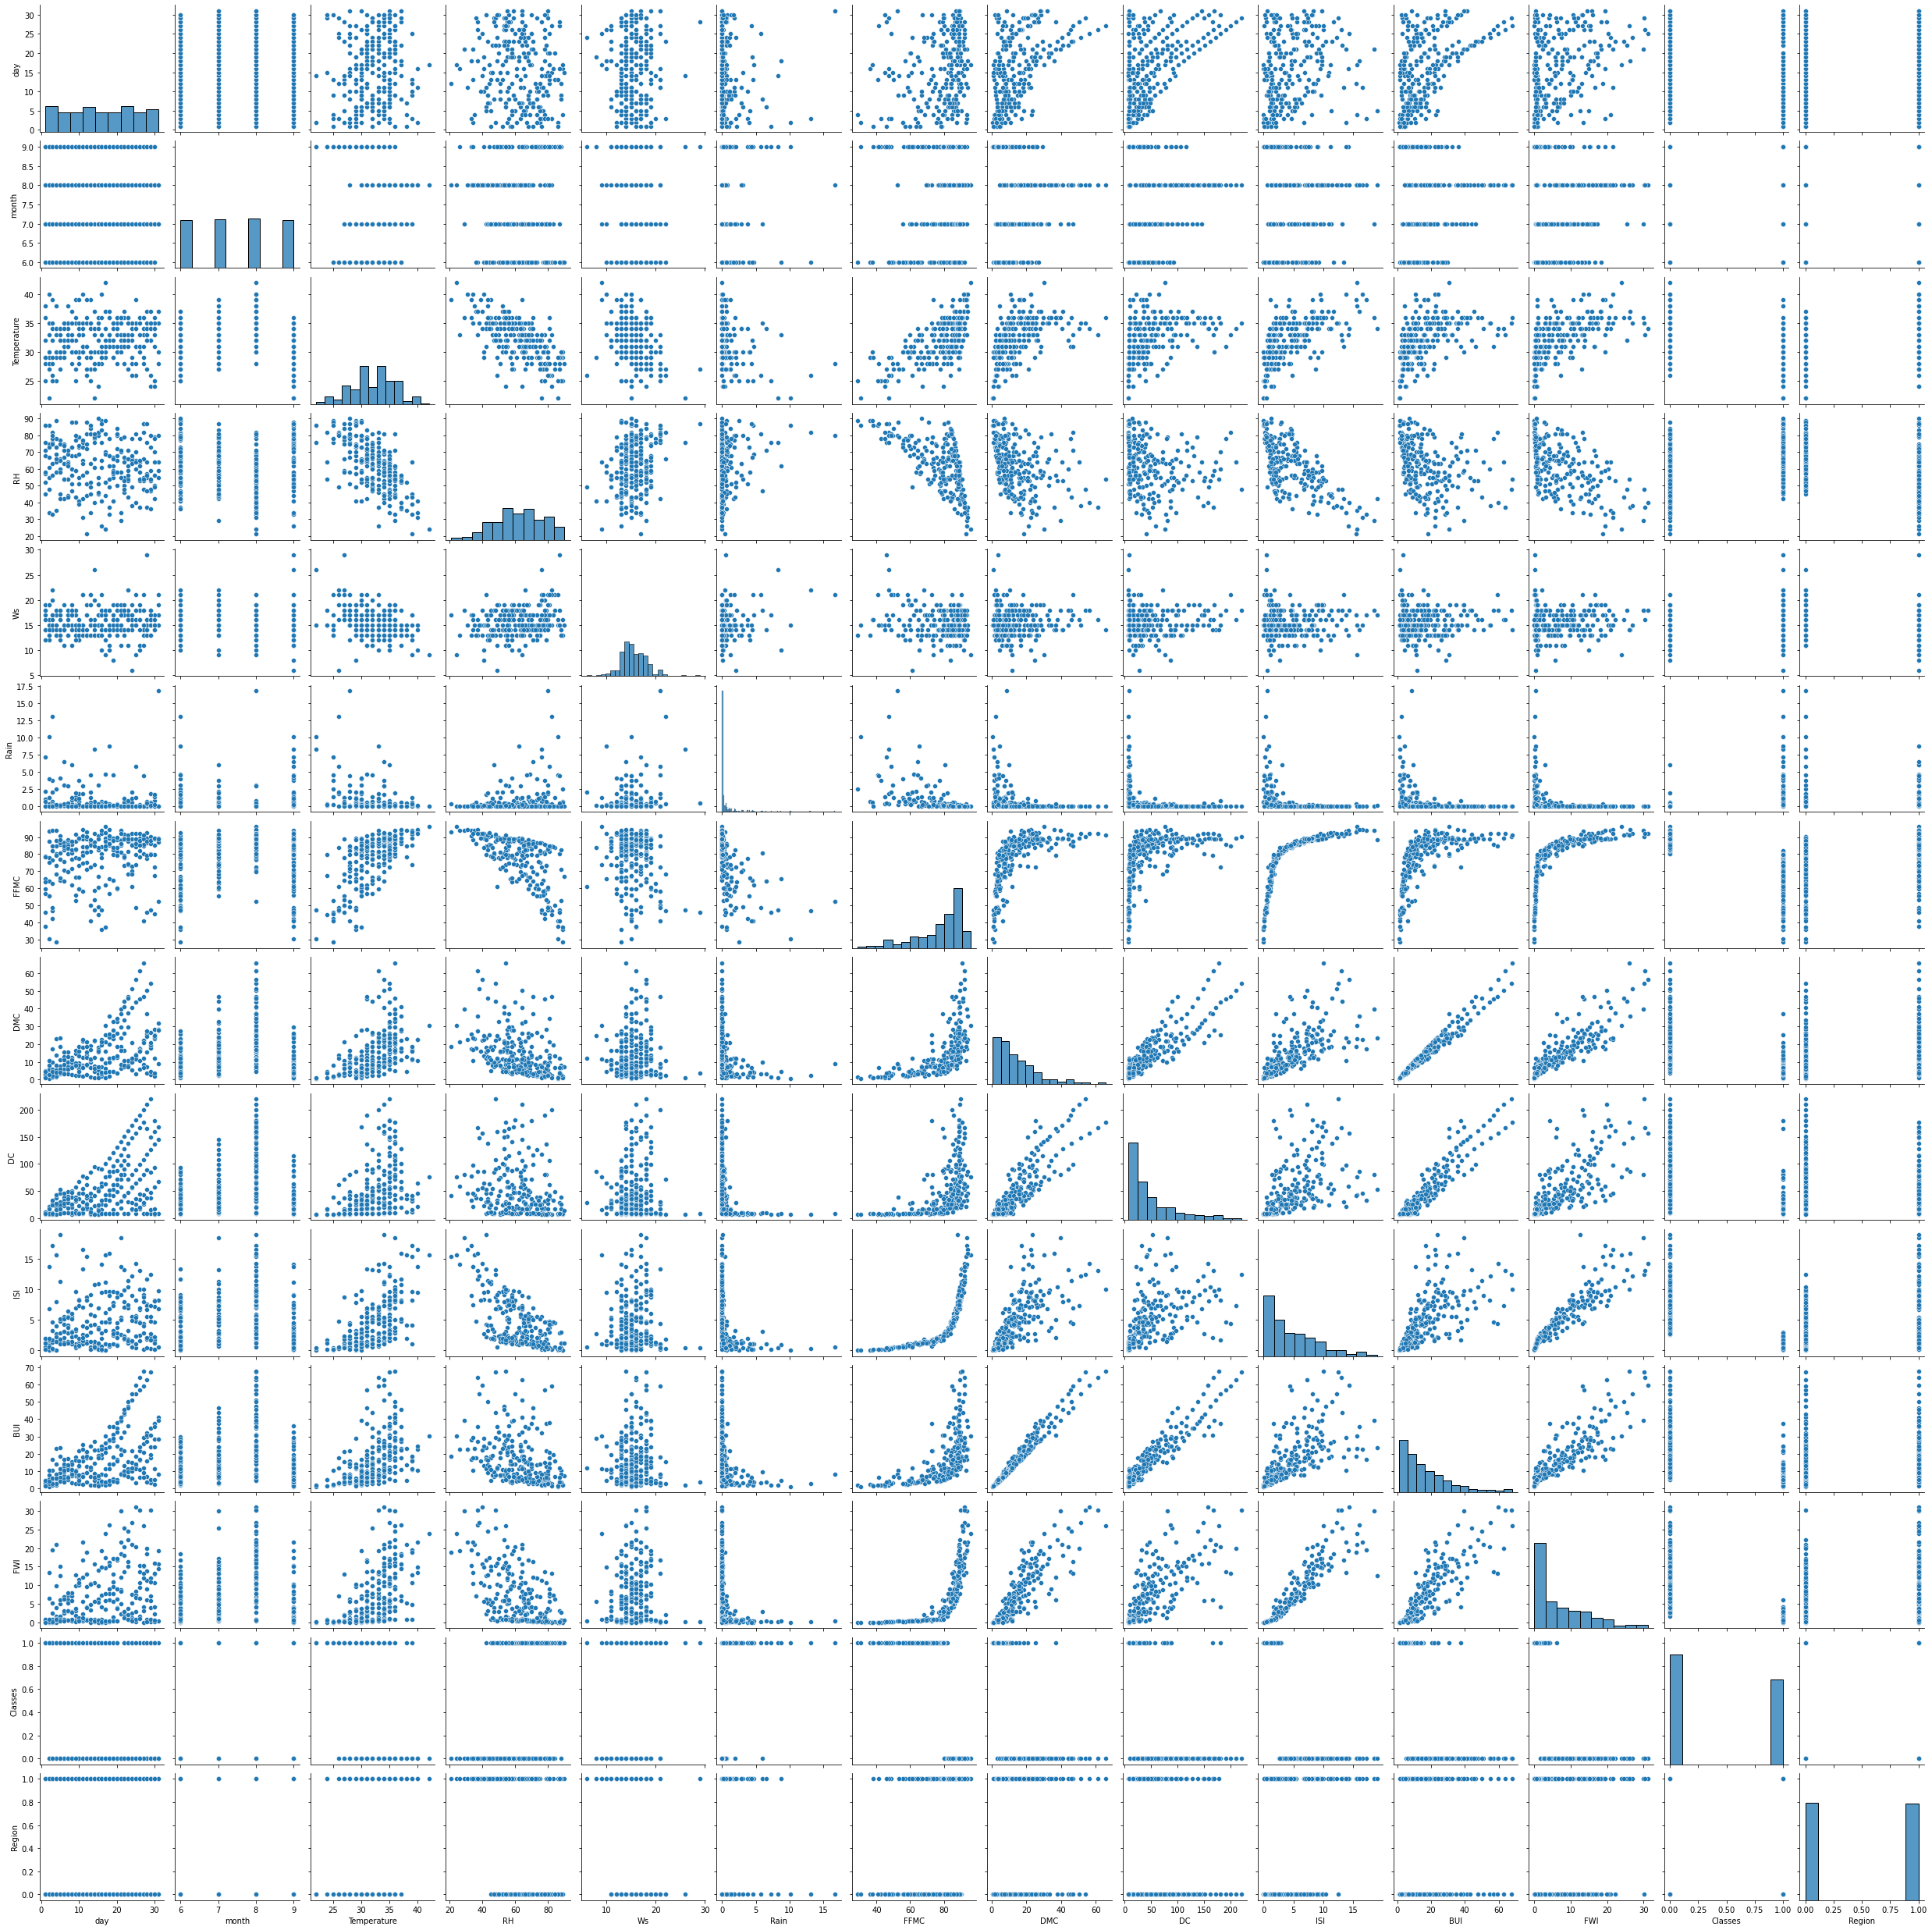

In [41]:
sns.pairplot(df2)

<AxesSubplot:>

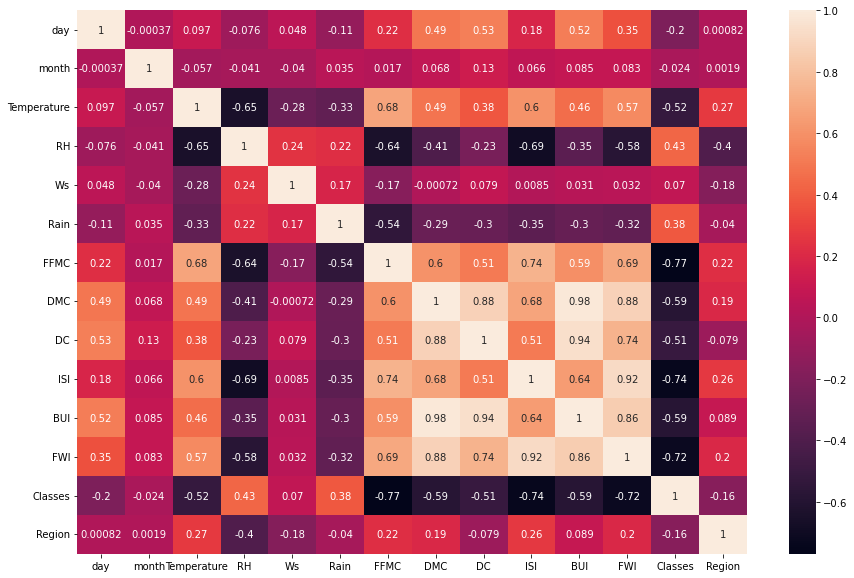

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

### Observation
* Rain is negatively corelated to Temperature, FFMC , DMC, Dc, ISI,BUI.
* RH is negatively corelated to Temperature, FWI,ISI,FFMC

In [46]:
df2.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


### Relation between Temperature and FWI Components

In [47]:
FWI_components=['FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

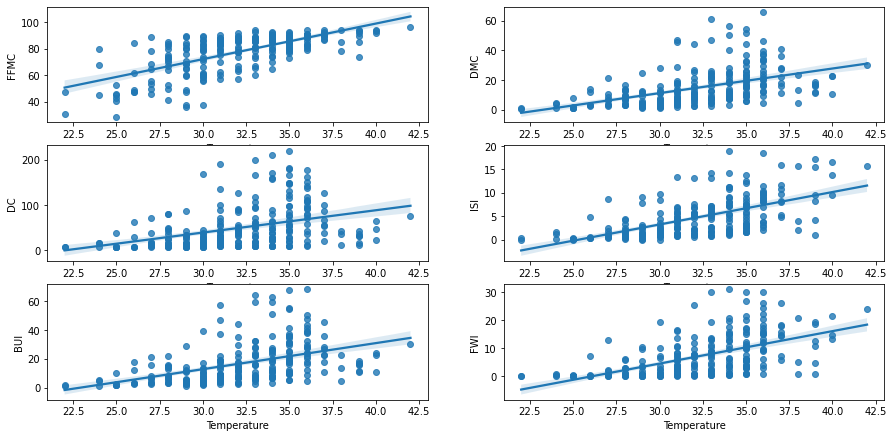

In [51]:
fig= plt.figure(figsize=(15,20))

for i in range(0,len(FWI_components)):
    plt.subplot(8,2,i+1)
    sns.regplot(data=df2,x='Temperature',y=FWI_components[i])

### Relation between RH and FWI Components

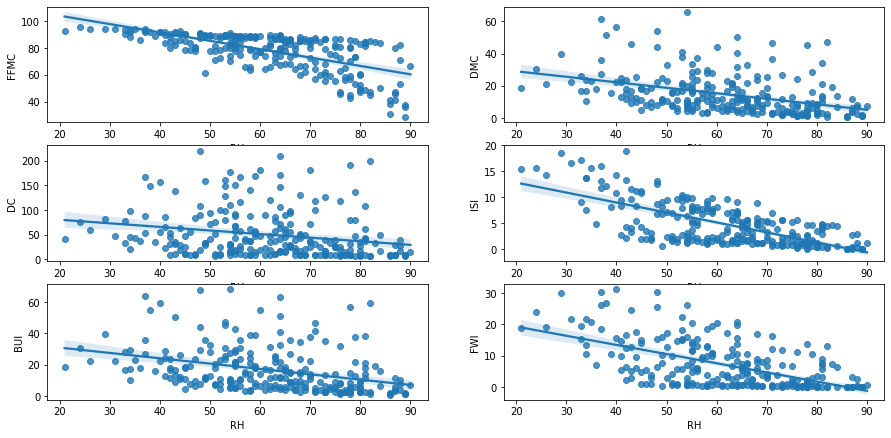

In [54]:
fig= plt.figure(figsize=(15,20))

for i in range(0,len(FWI_components)):
    plt.subplot(8,2,i+1)
    sns.regplot(data=df2,x='RH',y=FWI_components[i])

### Relation between Wind speed and FWI Components

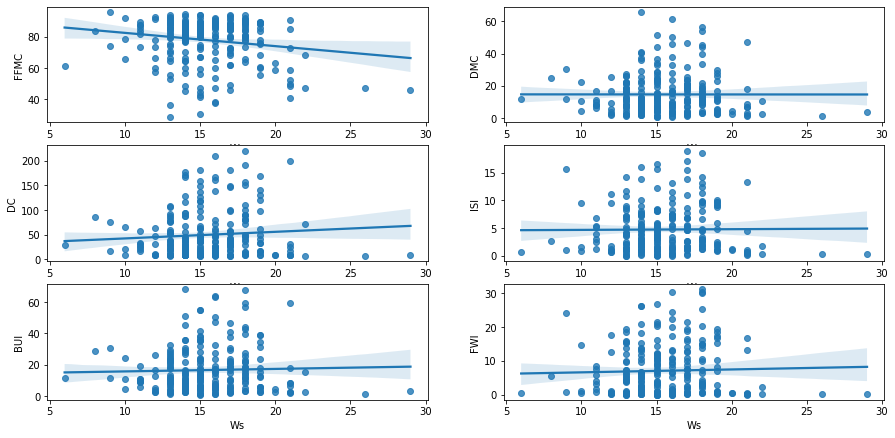

In [55]:
fig= plt.figure(figsize=(15,20))

for i in range(0,len(FWI_components)):
    plt.subplot(8,2,i+1)
    sns.regplot(data=df2,x='Ws',y=FWI_components[i])

### Relation between Rain and FWI Components

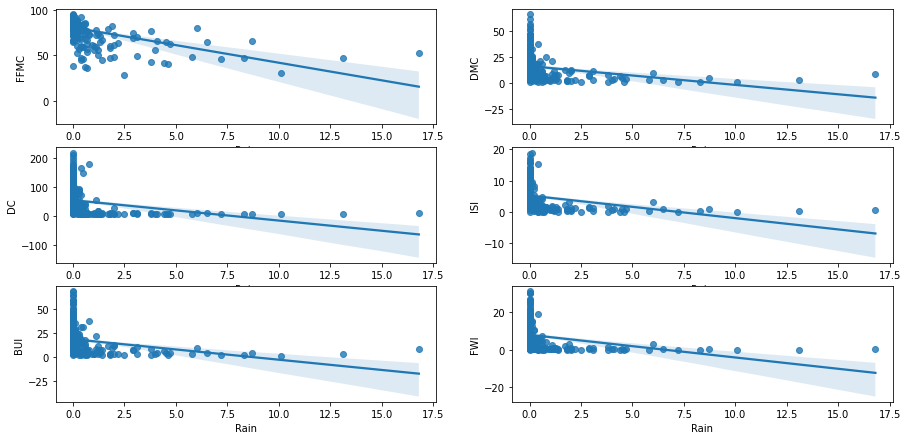

In [56]:
fig= plt.figure(figsize=(15,20))

for i in range(0,len(FWI_components)):
    plt.subplot(8,2,i+1)
    sns.regplot(data=df2,x='Rain',y=FWI_components[i])

### Histogram

* A histogram is a graph used to represent the frequency distribution of a few data points of one variable.

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

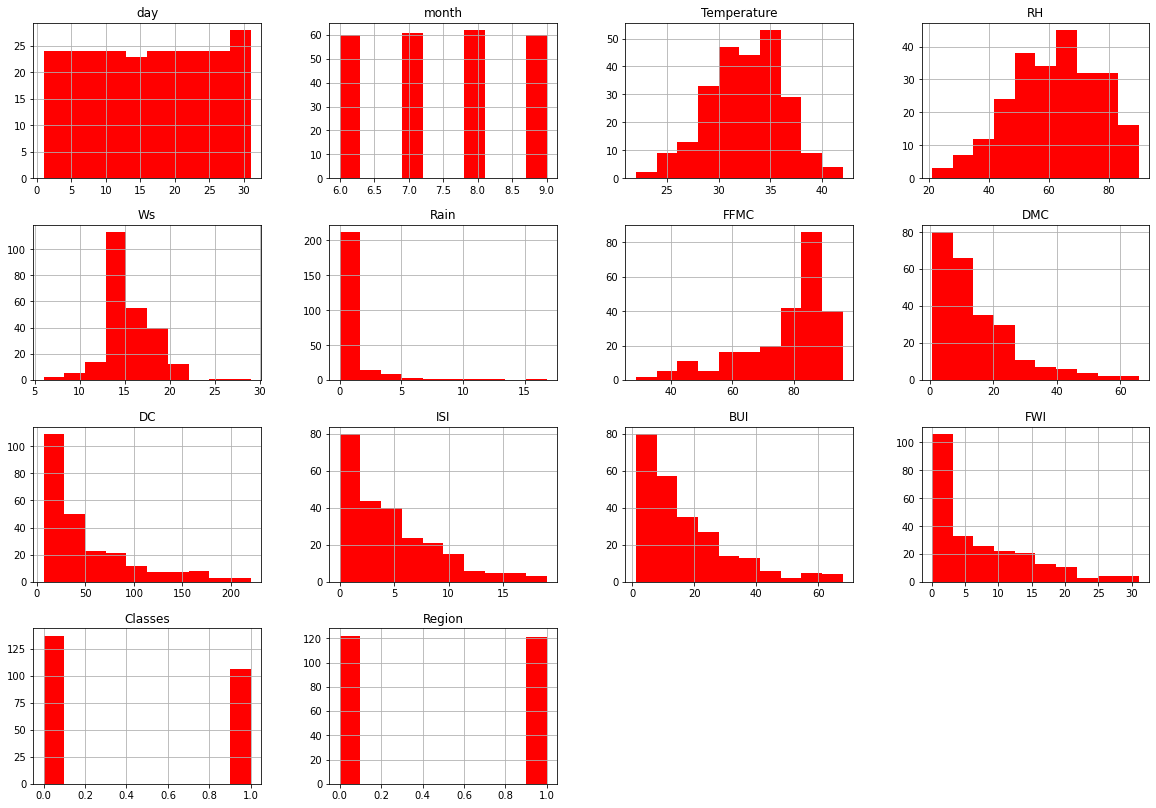

In [60]:
df2.hist(figsize=(20,14),color ='r')

### Pie Chart

In [61]:
# percentange of a box plot
percantage = df2.Classes.value_counts(normalize=True)*100

In [62]:
percantage

0    56.378601
1    43.621399
Name: Classes, dtype: float64

In [50]:
df2.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
243,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


* Plotting Pie chart

Text(0.5, 1.0, 'Pie Chart for Classes')

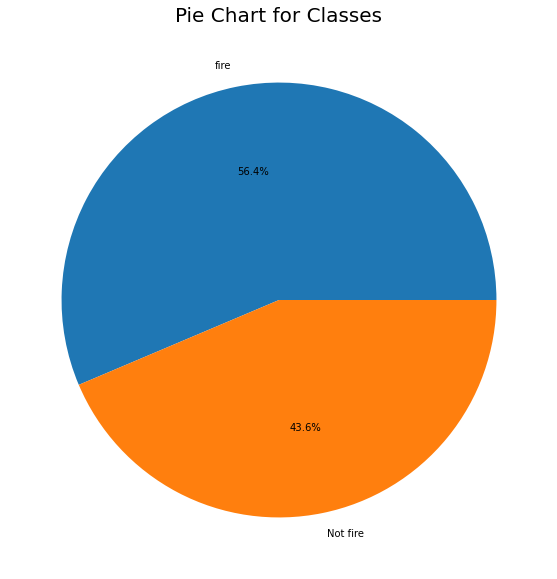

In [63]:
plt.figure(figsize=(15,10))
plt.pie(percantage,labels=['fire','Not fire'],autopct="%1.1f%%")
plt.title('Pie Chart for Classes',fontsize=20)

### Forest Fire Temperature box plot

<AxesSubplot:xlabel='Temperature'>

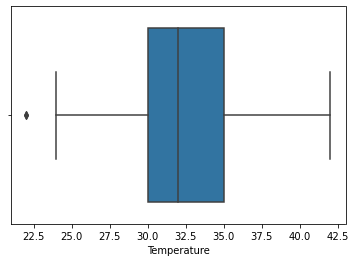

In [64]:
sns.boxplot(df2['Temperature'])

<AxesSubplot:xlabel='FWI'>

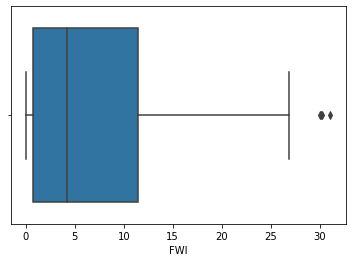

In [65]:
sns.boxplot(df2['FWI'])

 ### If temperature is target feature

In [72]:
X=df2.iloc[:,3:]
y=df2.iloc[:,2]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=10)

In [75]:
X_train.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0,0
121,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,1,0
174,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,0,1
72,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,1,0
186,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,0,1


In [76]:
X_test.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
46,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,0,0
226,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,0,1
181,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,0,1
116,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,1,0
124,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,1


## Standardzise dataset

In [77]:
from sklearn.preprocessing import StandardScaler

In [81]:
scalar = StandardScaler()

In [82]:
scalar

StandardScaler()

In [84]:
x_train_scaled=scalar.fit_transform(X_train)

In [85]:
x_train_scaled

array([[ 0.06835876,  0.89673457, -0.42406458, ...,  0.52024214,
        -0.90566259, -1.01242284],
       [ 0.99672801, -0.58185068,  0.40434065, ..., -0.93452011,
         1.10416397, -1.01242284],
       [ 0.53254338,  0.52708826, -0.42406458, ...,  1.30997022,
        -0.90566259,  0.9877296 ],
       ...,
       [-2.45150064, -0.95149699, -0.42406458, ...,  1.72561657,
        -0.90566259,  0.9877296 ],
       [ 0.06835876, -0.58185068, -0.42406458, ..., -0.8098262 ,
         1.10416397,  0.9877296 ],
       [ 1.0630401 , -1.3211433 , -0.42406458, ..., -0.82368108,
         1.10416397, -1.01242284]])

In [86]:
x_test_scaled = scalar.transform(X_test)

In [87]:
x_test_scaled

array([[ 4.66231295e-01, -5.81850675e-01, -4.24064583e-01,
         3.74594357e-01, -4.06694465e-01, -3.03195163e-01,
        -3.54971234e-01, -3.70810009e-01, -4.49599362e-01,
        -9.05662586e-01, -1.01242284e+00],
       [-9.26322582e-01,  1.26638088e+00, -4.24064583e-01,
         7.58044470e-01, -2.28559462e-01, -3.17928133e-01,
         1.05400512e+00, -2.76631780e-01,  4.78677502e-01,
        -9.05662586e-01,  9.87729597e-01],
       [-4.62137956e-01,  1.57441947e-01, -4.24064583e-01,
         7.77878096e-01,  8.14802699e-01,  1.80888129e-01,
         8.39076521e-01,  5.49238849e-01,  8.80468981e-01,
        -9.05662586e-01,  9.87729597e-01],
       [ 1.19566428e+00,  2.00567350e+00,  3.00789995e+00,
        -1.88643906e+00, -9.49582093e-01, -8.58838594e-01,
        -1.02363798e+00, -9.57612824e-01, -9.34520112e-01,
         1.10416397e+00, -1.01242284e+00],
       [ 1.12935219e+00, -5.81850675e-01,  7.59371462e-01,
        -1.87982786e+00, -1.01744305e+00, -8.60943304e-01,
  

In [51]:
## MODEL TRAINING

## Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
regression = LinearRegression()

In [90]:
regression

LinearRegression()

In [91]:
regression.fit(X_train,y_train)

LinearRegression()

In [92]:
## print the cofficient(features)  and intercept
# intercept is 1 and cofficient are 3
print(regression.coef_)

[-0.10061734 -0.26097983 -0.15918514  0.05397475  0.00170068  0.00854396
  0.05932616  0.02354577 -0.07438205 -0.3692032   0.39688752]


In [93]:
print(regression.intercept_)

37.80132740741701


In [94]:
## Prediction for test data
reg_pred=regression.predict(X_test)

In [95]:
reg_pred

array([32.06426777, 33.46213856, 33.77967967, 25.65926291, 28.57636169,
       33.62955514, 31.50104861, 34.55061595, 31.98267992, 33.40822187,
       34.03695712, 32.9599359 , 35.82574185, 32.12130935, 34.42981197,
       33.33509038, 27.63064755, 35.76984649, 32.84633361, 24.35936448,
       32.30743899, 32.41501073, 33.13657166, 33.27035852, 29.98758245,
       32.94087842, 33.87126014, 31.7310006 , 31.79220913, 34.86952639,
       34.11403991, 33.95972626, 34.36838549, 32.84022352, 31.11847533,
       28.75212409, 32.39802144, 31.87048283, 33.21401626, 33.76152242,
       34.27200573, 35.26137677, 34.10792419, 37.69887044, 32.75225436,
       36.55240926, 32.14418812, 35.48799056, 30.49625824, 31.14050809,
       32.46485588, 39.18248898, 32.22687923, 35.22185793, 27.73532842,
       36.79588639, 34.03598906, 34.05974566, 28.79584586, 32.53271823,
       32.61745143, 31.36407116, 24.03567901, 36.53283929, 35.90278549,
       29.28463961, 29.60745922, 29.25878222, 35.91528293, 28.05

In [96]:
## Assumption of liner regression
### main aim of assumption is to check our model is good or bad

Text(0, 0.5, 'Test predicted data')

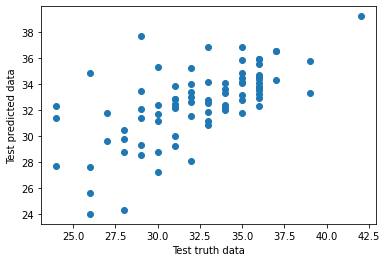

In [97]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Test truth data')
plt.ylabel("Test predicted data")
## if we get linear relationship model is good(when x increases y also increases)

In [98]:
#residual error
residual=y_test-reg_pred

In [99]:
residual

46    -3.064268
226   -4.462139
181    2.220320
116    0.340737
124    0.423638
         ...   
127    0.192837
242   -8.289960
208   -3.839297
102    2.750543
78     2.497342
Name: Temperature, Length: 81, dtype: float64

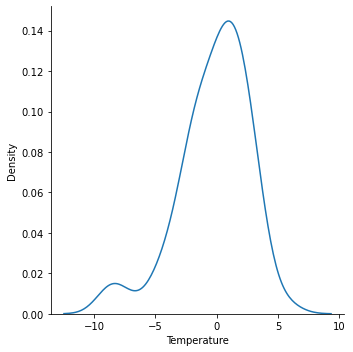

In [100]:
sns.displot(residual,kind='kde')

In [101]:
## scatter plot with prediction aand residual
## uniform distribution

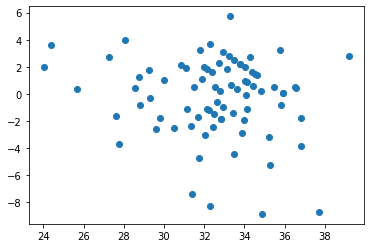

In [102]:
plt.scatter(reg_pred,residual)

In [103]:
## performance matrix

In [104]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

8.243321911237219
2.182365906064843
2.8711185818835867


In [105]:
## R square   

In [106]:
from sklearn.metrics import r2_score

In [107]:
score=r2_score(y_test,reg_pred)
print(score)

0.40451383929768125


In [108]:
## Adjusted r score

In [109]:
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.30958126295383337

## Ridge Regression

In [110]:
from sklearn.linear_model import Ridge

In [111]:
ridge= Ridge()

In [112]:
ridge.fit(X_train,y_train)

Ridge()

In [113]:
## print cofficient features and intercept


In [149]:
print(ridge.intercept_)

37.72455743768923


In [150]:
print(ridge.coef_)

[-0.10040063 -0.26117207 -0.15763105  0.05467637  0.00249577  0.00845908
  0.05931355  0.02281235 -0.07296519 -0.34187332  0.38435712]


In [151]:
ridge_pred=ridge.predict(x_test_scaled)

In [152]:
ridge_pred


array([37.8372395 , 38.30239269, 38.53009517, 35.71277939, 37.51653375,
       38.51116574, 36.78556134, 38.56952488, 38.42617127, 37.21417959,
       38.35073581, 37.9038191 , 38.65911359, 37.70529812, 38.39831309,
       37.5915126 , 36.56946081, 38.65055459, 37.8798068 , 34.71848512,
       37.48313523, 37.68811151, 37.6065151 , 38.29441214, 36.77246215,
       38.48878023, 37.54069539, 37.577242  , 37.13907443, 38.56309072,
       38.06789294, 38.72270279, 38.50748017, 37.79983266, 37.12628657,
       36.7573627 , 37.47468378, 37.68662301, 37.50315863, 37.29661025,
       38.63320234, 38.73742669, 37.96342748, 39.38762232, 37.6426583 ,
       38.87509475, 37.609833  , 38.11318927, 37.42445322, 37.77756135,
       37.86281891, 39.4573726 , 37.85653695, 38.30031615, 36.77068763,
       38.74955496, 38.63528656, 38.08069978, 37.62284132, 37.76441282,
       37.74424983, 37.10227616, 34.92113936, 38.96157489, 38.74253118,
       37.07040504, 36.32364493, 37.10782054, 38.62016976, 36.37

In [153]:
residuals=y_test-ridge_pred

In [154]:
residuals

46     -8.837240
226    -9.302393
181    -2.530095
116    -9.712779
124    -8.516534
         ...    
127    -3.995150
242   -13.612442
208    -5.659038
102    -6.155083
78     -1.590182
Name: Temperature, Length: 81, dtype: float64

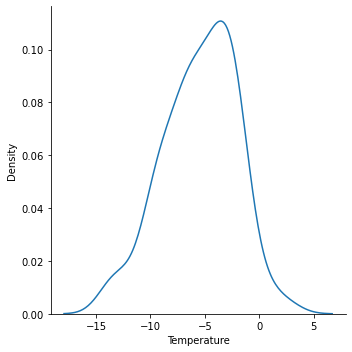

In [120]:
sns.displot(residuals,kind="kde")


### Performance Metrics



In [155]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

40.90259476536914
5.551707804800206
6.395513643591822


### R SQUARE & ADJUSTED R SQUARE

In [122]:
score=r2_score(y_test,reg_pred)
score

0.40451383929768125

In [123]:
## Adjusted R square

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.30958126295383337

## LASSO

In [125]:
from sklearn.linear_model import Lasso

In [126]:
lasso=Lasso()
lasso

Lasso()

In [127]:
lasso.fit(x_train_scaled,y_train)


Lasso()

In [128]:
print(lasso.coef_)
print(lasso.intercept_)


[-0.88423537 -0.         -0.          0.88313134  0.          0.
  0.          0.          0.         -0.          0.        ]
32.074074074074076


In [129]:
lasso_pred=lasso.predict(x_test_scaled)


In [130]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

In [131]:
residuals=y_test-lasso_pred

In [132]:
residuals

46    -2.992632
226   -4.562614
181    2.830319
116   -3.350852
124   -0.415326
         ...   
127    2.016653
242   -8.749804
208   -1.476428
102   -0.163412
78     2.683855
Name: Temperature, Length: 81, dtype: float64

### Performance Metrics



In [133]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


### R SQUARE & ADJUSTED R SQUARE



In [134]:
score=r2_score(y_test,lasso_pred)
score

0.3719123543887275

In [135]:
## Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.2717824398709884

In [137]:
from sklearn.linear_model import ElasticNet

## ElasticNet

In [139]:
elastic_net=ElasticNet()

In [140]:
elastic_net.fit(x_train_scaled,y_train)

ElasticNet()

In [141]:
print(elastic_net.coef_)
print(elastic_net.intercept_)


[-0.7730265  -0.26945253 -0.02396636  0.67644044  0.10592038  0.
  0.18367796  0.03890539  0.10736141 -0.12263291  0.        ]
32.074074074074076


In [142]:
elastic_net_pred=elastic_net.predict(x_test_scaled)
elastic_net_pred

array([32.07409039, 33.29293313, 33.39263218, 28.69961366, 29.49374905,
       33.25881227, 31.64944534, 33.96769667, 32.19566374, 32.6253187 ,
       32.53967421, 32.79104134, 34.34008686, 32.04655715, 32.69212517,
       33.40819207, 29.24666067, 35.09553512, 32.51236162, 28.84719082,
       32.04686673, 31.94146   , 32.90451267, 32.09994982, 30.69117185,
       32.84175353, 32.80749928, 31.70511919, 31.74844972, 32.57412681,
       33.4332043 , 33.07529204, 33.29587412, 32.70094519, 31.5247729 ,
       29.86224568, 32.20245403, 31.65054472, 33.31130095, 32.77809367,
       33.63822223, 34.12018474, 33.53213032, 34.40329859, 32.8685631 ,
       35.48710781, 31.90216194, 34.21871278, 30.97975835, 31.50089875,
       32.42299224, 36.61434905, 32.15427936, 33.96759058, 29.12343931,
       35.27201784, 33.49130546, 32.46770779, 29.82387004, 32.19644604,
       32.44217857, 31.33525761, 28.36842114, 35.09711535, 34.56195088,
       30.26102351, 30.51552991, 30.38246618, 34.74948956, 29.81

In [143]:
residuals=y_test-elastic_net_pred

In [144]:
residuals

46    -3.074090
226   -4.292933
181    2.607368
116   -2.699614
124   -0.493749
         ...   
127    1.793978
242   -7.937668
208   -2.433697
102    0.573775
78     2.596471
Name: Temperature, Length: 81, dtype: float64

## Performance Metrics



In [145]:
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

7.915513754032117
2.286670095063569
2.813452283944428


### R SQUARE & ADJUSTED R SQUARE

In [146]:
score=r2_score(y_test,elastic_net_pred)
score

0.4281942466726336

In [147]:
## Adjusted R square

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.3370368077363869